<div style="color:#3F497F;font-size:70px;font-family:Georgia;text-align:center;">A/B Testing</div>

<div style="float:center;margin-left:210px;max-width:60%;">
<img src="https://cdn.dribbble.com/users/299116/screenshots/16642724/media/2df13bcb6b66092dc502b92cd441deba.jpg"></div>



<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;">“A/B testing can provide value, but it shouldn’t come at the expense of other areas of design.”
 </strong>
 
 The process of decision making in design has always been a popular area of discussion. Why do some designers make choices that others don’t, and why do some designs seemingly work better than others?

From academic study to sketches and anecdotes, the design world is fascinated with process. But for all of the legendary stories of lore, few anecdotes in recent times have had the staying power of Google and its 41 shades of blue.

In trying to determine which out of 2 shades of blue to use for link text, Google tested not only the 2, but also the 39 shades of blue in between. The story outlines a relatively minute decision but highlights a rapidly growing approach to making decisions. One based in experimentation, alternatives, and, most importantly, data.



1. Define your conversion goal. In this example, you want to measure click-through rate. 

2. Design the A/B test. How big of a sample size do you want? Who will participate, new customers or existing customers? 

3. Gather data. Will you run your own test or use A/B testing software? For how long will the test run?

4. Analyze the results. Which variation had the biggest positive impact on the conversion metric that matters most? 



<strong style="color:#443C68;font-size:20px;font-family:Georgia;"> AB Testing Process </strong>

* Understanding business problem & data
* Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)
* Look summary stats and plots
* Apply hypothesis testing and check assumptions
* Check Normality & Homogeneity
* Apply tests (Shapiro, Levene Test, T-Test, Welch Test, Mann Whitney U Test)
* Evaluate the results
* Make inferences
* Recommend business decision to your customer/director/ceo etc.

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "background-color:#443C68;font-family:Georgia;color:#F0FF42;font-size:200%;text-align:LEFT;border-radius:20px 40px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FFEA20;">...Table of Contents...</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="home" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Packages-Libraries-Settings <span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Data Understandıng<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">A/B Testing BEFORE Removing The Extreme Values<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">A/B Testing AFTER Removing The Extreme Values<span class="badge badge-primary badge-pill">4</span></a> 
</div>
</div>
</div>



<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;">  Descriptions: The data is about an A/B test with a mobile game called "Cookie Cats".
 </strong>

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.

To complete this project, you should be comfortable working with pandas DataFrames and with using the pandas plot method. You should also have some understanding of hypothesis testing and bootstrap analysis.


<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;">  Dataset columns descriptions:
 </strong>


* userid: A unique number that identifies each player.
* version: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
* sum_gamerounds: The number of game rounds played by the player during the first 14 days after install.
* retention_1: Did the player come back and play 1 day after installing?
* retention_7: Did the player come back and play 7 days after installing?

<a id = "1"></a>
<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;">  Packages-Libraries-Settings 📜 ⚙️ </strong>

In [1]:
#!pip install statsmodels
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
palette = 'Set2'
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal, normaltest
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 180)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;">  Load Data </strong>

In [2]:
df = pd.read_csv('/kaggle/input/mobile-games-ab-testing/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<a id = "2"></a>
<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> Data Understandıng </strong>

In [3]:
def check_df(dataframe, head=5):
    print(" SHAPE ".center(90,'~'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(90,'~'))
    print(dataframe.dtypes)
    print(" HEAD ".center(90,'~'))
    print(dataframe.head(head))
    print(" TAIL ".center(90,'~'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(90,'~'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(90,'~'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(90,'~'))
    print(dataframe.describe().T)
    
check_df(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 90189
Columns: 5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ HEAD ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TAIL ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        userid  version  sum_gamerounds  retention_1  retention_7
90184  9999441  gate_40              97   

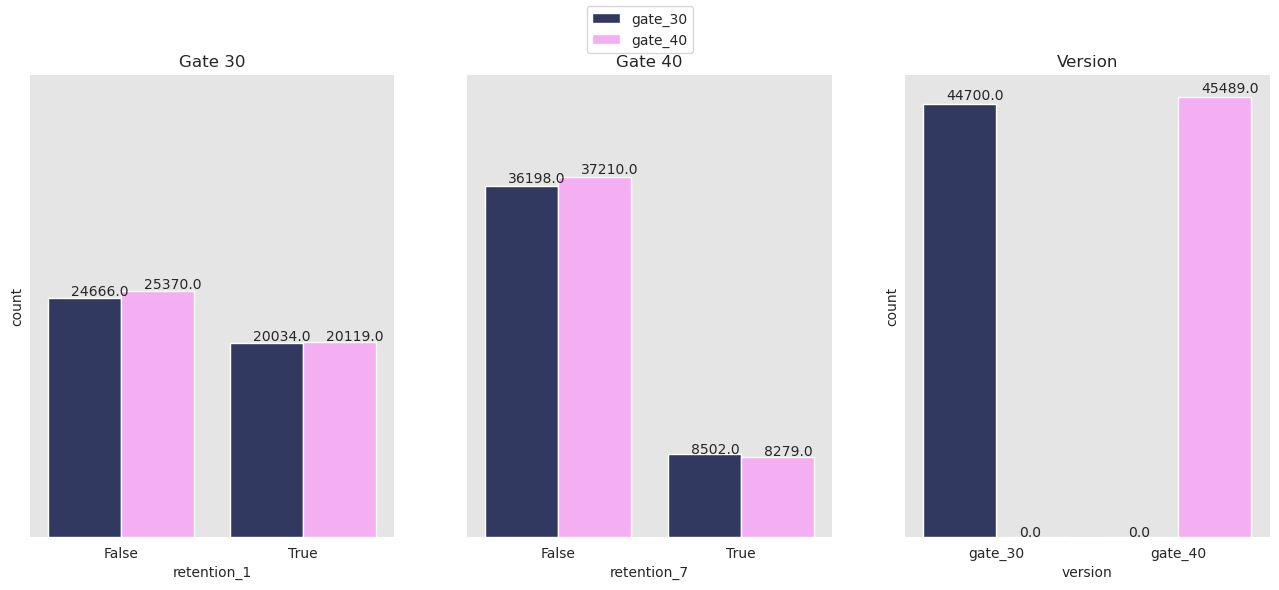

####**RETENTION_1**#####

       retention_1    Ratio
False        50036 55.47905
True         40153 44.52095
####**RETENTION_7**#####

       retention_7    Ratio
False        73408 81.39352
True         16781 18.60648
####**VERSION**#####

         version    Ratio
gate_40    45489 50.43741
gate_30    44700 49.56259


In [4]:
fig, axes = plt.subplots(1, 3, figsize = (16, 6), facecolor = "#FFFFFF", sharey = True)

sns.countplot(x = "retention_1", data = df, hue = "version",
              ax = axes[0], palette = ["#2B3467", "#FFA3FD"]).set_title("Gate 30")

sns.countplot(x = "retention_7", data = df, hue = "version",
              ax = axes[1], palette = ["#2B3467", "#FFA3FD"]).set_title("Gate 40")

sns.countplot(x = "version", data = df, hue = "version",
              ax = axes[2], palette = ["#2B3467", "#FFA3FD"]).set_title("Version")

for ax in axes:
    
    ax.set_facecolor("#e5e5e5")
    ax.get_legend().remove()
    ax.set_yticks([])
    
    for p in ax.patches:
        
        txt = p.get_height()
        ax.text(p.get_x() + 0.125, p.get_height()*1.01, txt, fontsize = 10)
        
axes[1].set_ylabel("")
        
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = "upper center")

sns.despine(left = True, bottom = True)
plt.show()

print("\033[1m####**RETENTION_1**#####\n\033[0m")
print(pd.DataFrame({"retention_1": df['retention_1'].value_counts(),
                        "Ratio": 100 * df['retention_1'].value_counts() / len(df)}))


print("\033[1m####**RETENTION_7**#####\n\033[0m")
print(pd.DataFrame({'retention_7': df['retention_7'].value_counts(),
                        "Ratio": 100 * df['retention_7'].value_counts() / len(df)}))


print("\033[1m####**VERSION**#####\n\033[0m")
print(pd.DataFrame({'version': df['version'].value_counts(),
                        "Ratio": 100 * df['version'].value_counts() / len(df)}))

<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> Retention variables gives us player retention details. </strong>

* retention_1 - did the player come back and play 1 day after installing?
* retention_7 - did the player come back and play 7 days after installing?
Also players tend not to play the game! There are many players who quit the game.

* 55 percent of the players didn't play the game 1 day after insalling
* 81 percent of the players didn't play the game 7 day after insalling

In [5]:
df['sum_gamerounds'].sort_values()

45094        0
56753        0
56786        0
56834        0
56876        0
         ...  
48188     2294
43671     2438
29417     2640
7912      2961
57702    49854
Name: sum_gamerounds, Length: 90189, dtype: int64

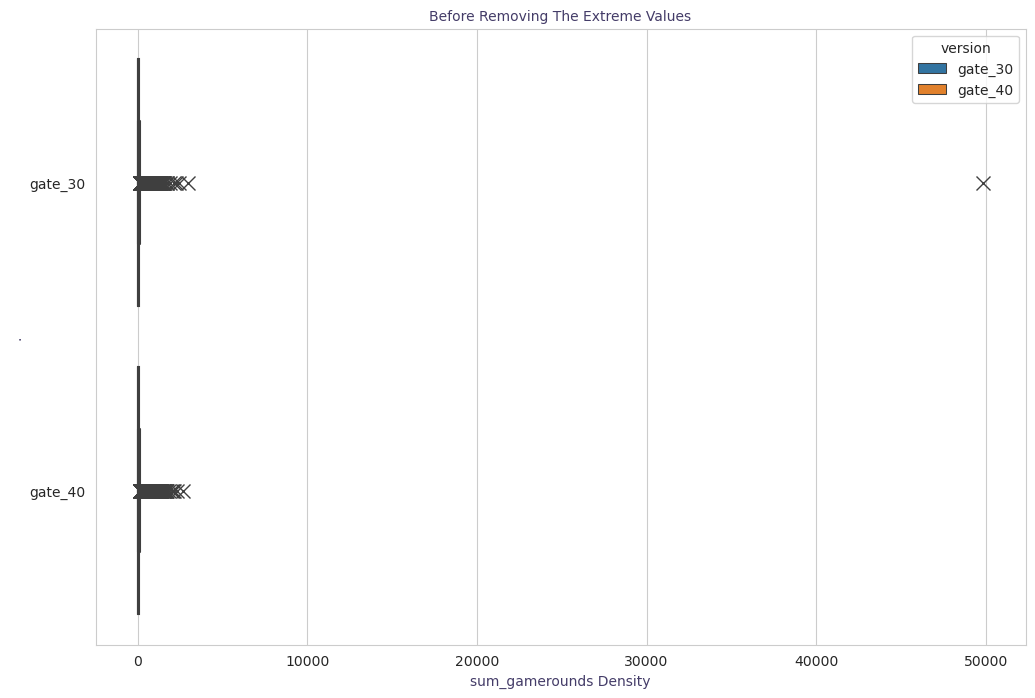

In [6]:
fig, ax = plt.subplots(figsize = (12, 8), facecolor = "#FFFFFF")
ax.set_facecolor("#FFFFFF")

sns.boxplot(data=df, x="sum_gamerounds", y="version", hue="version", dodge=False,
            flierprops={"marker": "x"}, width=.8, fliersize=10)
plt.title('Before Removing The Extreme Values', size = 10, color='#443C68')
plt.ylabel('.', size = 10,color="#443C68" )
plt.xlabel('sum_gamerounds Density', fontsize = 10,color="#443C68" )
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()


<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> As can be seen from the data, there are outliers in the sum_gamerounds column. What if we set up our hypotheses without clearing out the outliers? Let's see... </strong>


<a id = "3"></a>
<strong style="color:#443C68;font-size:40px;font-family:Georgia;text-align:center;"> A/B Testing Before Removing The Extreme Values </strong>

<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> H0: Distribution is Normal! </strong>

<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> H1: Distribution is not Normal! </strong>

<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> H0: M1 = M2</strong>

<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> H1: M1 != M2</strong>


In [7]:
df['userid'].nunique()

90189

In [8]:
# A/B Groups & Target Summary Stats
df.groupby("version").agg({'sum_gamerounds': ["count", "median", "mean", "std", "max"]})

sum_gamerounds                                   
                 count   median     mean       std    max
version                                                  
gate_30          44700 17.00000 52.45626 256.71642  49854
gate_40          45489 16.00000 51.29878 103.29442   2640

<strong style="color:#443C68;font-size:30px;font-family:Georgia;text-align:center;">  Normality</strong>




In [9]:
print("\033[1msum_gamerounds normality for gate 40: \n\033[0m")
test_stat, pvalue = shapiro(df.loc[df["version"] == "gate_30", "sum_gamerounds"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

print("\033[1mOur series is not normally distributed. \n\033[0m")


sum_gamerounds normality for gate 40: 

Test Stat = 0.0881, p-value = 0.0000
Our series is not normally distributed. 



In [10]:

print("\033[1msum_gamerounds normality for gate 40: \n\033[0m")
test_stat, pvalue = shapiro(df.loc[df["version"] == "gate_40", "sum_gamerounds"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

print("\033[1mOur series is not normally distributed. \n\033[0m")
    

sum_gamerounds normality for gate 40: 

Test Stat = 0.4826, p-value = 0.0000
Our series is not normally distributed. 



<strong style="color:#443C68;font-size:30px;font-family:Georgia;text-align:center;">  Homogeneity of variances </strong>




In [11]:
print("\033[1msum_gamerounds normality for gate 30 and gate 40: \n\033[0m")


test_stat, pvalue = levene(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                           df.loc[df["version"] == "gate_40", "sum_gamerounds"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


print("\033[1mOur series is not homogen. \n\033[0m")


sum_gamerounds normality for gate 30 and gate 40: 

Test Stat = 0.5292, p-value = 0.4669
Our series is not homogen. 



In [12]:
#non-parametrik test
test_stat, pvalue = mannwhitneyu(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                                 df.loc[df["version"] == "gate_40", "sum_gamerounds"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

print("\033[1mWe can not reject H0 hypothesis, "
              "so that A/B groups are similar!.\n\033[0m")


Test Stat = 1024331250.5000, p-value = 0.0502
We can not reject H0 hypothesis, so that A/B groups are similar!.



<a id = "4"></a>
<strong style="color:#443C68;font-size:40px;font-family:Georgia;text-align:center;"> A/B Testing After Removing The Extreme Values </strong>

<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> H0: Distribution is Normal! </strong>

<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> H1: Distribution is not Normal! </strong>

<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> H0: M1 = M2</strong>

<strong style="color:#443C68;font-size:20px;font-family:Georgia;text-align:center;"> H1: M1 != M2</strong>


In [13]:

df = df[df.sum_gamerounds < df.sum_gamerounds.max()]
df['sum_gamerounds'].describe()

count   90188.00000
mean       51.32025
std       102.68272
min         0.00000
25%         5.00000
50%        16.00000
75%        51.00000
max      2961.00000
Name: sum_gamerounds, dtype: float64

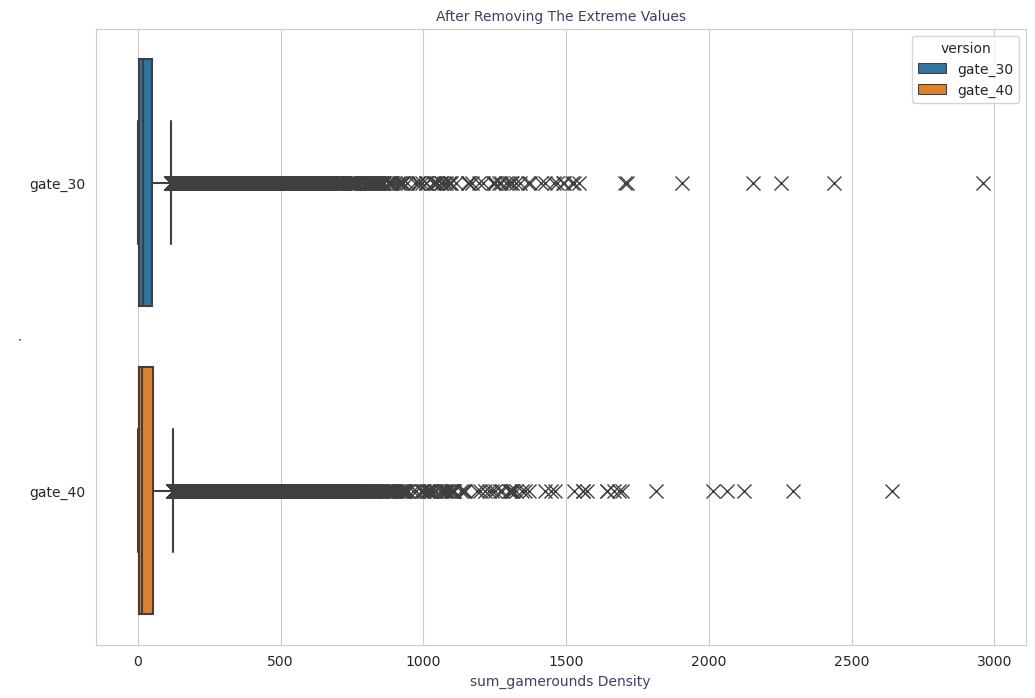

In [14]:
fig, ax = plt.subplots(figsize = (12, 8), facecolor = "#FFFFFF")
ax.set_facecolor("#FFFFFF")

sns.boxplot(data=df, x="sum_gamerounds", y="version", hue="version", dodge=False,
            flierprops={"marker": "x"}, width=.8, fliersize=10)
plt.title('After Removing The Extreme Values', size = 10, color='#443C68')
plt.ylabel('.', size = 10,color="#443C68" )
plt.xlabel('sum_gamerounds Density', fontsize = 10,color="#443C68" )
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()


In [15]:
# What is the confidence interval for the 'REVENUE' value?

sms.DescrStatsW(df["sum_gamerounds"]).tconfint_mean()

(50.650095717882344, 51.99041077965614)

In [16]:
df.groupby('version').agg({'sum_gamerounds': ['sum', 'count']}).reset_index()


version sum_gamerounds       
                      sum  count
0  gate_30        2294941  44699
1  gate_40        2333530  45489

<strong style="color:#443C68;font-size:30px;font-family:Georgia;text-align:center;"> Normality</strong>




In [17]:
print("\033[1msum_gamerounds normality for gate 40: \n\033[0m")
test_stat, pvalue = shapiro(df.loc[df["version"] == "gate_30", "sum_gamerounds"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

print("\033[1mOur series is not normally distributed. \n\033[0m")


sum_gamerounds normality for gate 40: 

Test Stat = 0.4886, p-value = 0.0000
Our series is not normally distributed. 



In [18]:
print("\033[1msum_gamerounds normality for gate 40: \n\033[0m")
test_stat, pvalue = shapiro(df.loc[df["version"] == "gate_40", "sum_gamerounds"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


print("\033[1mOur series is not normally distributed. \n\033[0m")


sum_gamerounds normality for gate 40: 

Test Stat = 0.4826, p-value = 0.0000
Our series is not normally distributed. 



<strong style="color:#443C68;font-size:30px;font-family:Georgia;text-align:center;"> Homogeneity of variances </strong>



In [19]:
print("\033[1msum_gamerounds normality for gate 30 and gate 40: \n\033[0m")


test_stat, pvalue = levene(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                           df.loc[df["version"] == "gate_40", "sum_gamerounds"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

print("\033[1mOur variance of series is homogen. \n\033[0m")


sum_gamerounds normality for gate 30 and gate 40: 

Test Stat = 0.0751, p-value = 0.7840
Our variance of series is homogen. 



In [20]:
#non-parametrik test
test_stat, pvalue = mannwhitneyu(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                                 df.loc[df["version"] == "gate_40", "sum_gamerounds"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

print("\033[1mWe can not reject H0 hypothesis, "
              "so that A/B groups are similar!.\n\033[0m")

Test Stat = 1024285761.5000, p-value = 0.0509
We can not reject H0 hypothesis, so that A/B groups are similar!.




<strong style="color:#443C68;font-size:40px;font-family:Georgia;text-align:center;"> Conclusion: </strong>

<strong style="color:#443C68;font-size:30px;font-family:Arial;text-align:center;"> If we need to summarise briefly;</strong>

<strong style="color:#443C68;font-size:20px;font-family:Arial;text-align:center;"> We apply Mann Whitney U test for comparing sum_gamerounds for both version.</strong>
 
 <strong style="color:#443C68;font-size:20px;font-family:Arial;text-align:center;"> For Mann Whitney U test, we don't have statistically significant difference between groups. They have similar sum_gamerounds.</strong>
      
 <strong style="color:#443C68;font-size:20px;font-family:Arial;text-align:center;">The Mann Whitney U test I ran before cleaning out the outliers yielded p_value=0.0502. </strong>
          
 <strong style="color:#443C68;font-size:20px;font-family:Arial;text-align:center;">When I cleared the maximum value, p_value=0.0509 appeared. In this case, we can say that the H0 hypothesis cannot be rejected. </strong>
               
<strong style="color:#443C68;font-size:20px;font-family:Arial;text-align:center;">However, in order to reach a clearer conclusion, it is necessary to perform A/B test on a larger data set. In addition, a larger change to the outliers may reduce the yyy value to less than 0.05.</strong>



<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">If you like this then please UPVOTE this. Your opinions and suggestions are very important to me...Thanks <img src="https://media.giphy.com/media/WUlplcMpOCEmTGBtBW/giphy.gif" width="100"> <div style="float:center;margin-left:270px;max-width:50%;">

<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">
FOR MORE:</p> 

https://www.linkedin.com/in/serdar-ozturk/

https://github.com/Serdar-Trk

https://medium.com/@serdar.f95

<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">CREDITS:</p> 

[https://numpy.org/](http://)

[https://seaborn.pydata.org/](http://)

[https://pandas.pydata.org](http://)

[https://pandas.pydata.org/](http://)

[https://learning.miuul.com](http://)